In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [2]:
# Load pre-trained MobileNetV2 model without the classification head (top layer)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
!pip install kaggle

In [11]:
# prompt: mount google

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# prompt: /content/drive/MyDrive/Object-Detection.v17i.yolov5-obb.zip how i can access this and unzip it

import zipfile

# Path to your zip file
zip_file_path = '/content/drive/MyDrive/Object-Detection.v17i.yolov5-obb.zip'

# Destination directory for unzipping
extract_dir = '/content/extracted_object_detection'  # Choose your desired directory

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully unzipped {zip_file_path} to {extract_dir}")

except FileNotFoundError:
    print(f"Error: File not found at {zip_file_path}")
except zipfile.BadZipFile:
    print(f"Error: Invalid zip file at {zip_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully unzipped /content/drive/MyDrive/Object-Detection.v17i.yolov5-obb.zip to /content/extracted_object_detection


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)  # Validation set only requires rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/extracted_object_detection/train',
    target_size=(224, 224),  # Ensure this matches your model input size
    batch_size=32,
    class_mode='categorical'
)

# Removed the extra 'class_mode' line, corrected indentation, and directory path
val_generator = val_datagen.flow_from_directory(
    '/content/extracted_object_detection/valid', # Fixed directory path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Removed the extra 'class_mode' line, corrected indentation, and directory path
test_generator = test_datagen.flow_from_directory(
    '/content/extracted_object_detection/test', # Fixed directory path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 708 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [17]:
# Freeze the base model layers to prevent them from being updated during the first training phase
base_model.trainable = False

In [18]:
# Add a custom classification head on top
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(4, activation='softmax')  # Adjust the number of classes for your dataset
])

In [22]:
# Compile the model with a learning rate scheduler
# Compile the model with a learning rate scheduler
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Define learning rate scheduler to reduce the learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.1,
    min_lr=1e-6
)

In [30]:
# Calculate class weights if needed
# Assuming 'train_generator.classes' contains class labels for training data
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
# Compile the model with a learning rate scheduler
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [31]:
# Define learning rate scheduler to reduce the learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.1,
    min_lr=1e-6
)



class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)



In [32]:
# Convert class weights to dictionary format
class_weights = dict(enumerate(class_weights))

# Add a custom classification head on top
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(2, activation='softmax')  # Change the number of classes to 2
])



In [38]:
val_batch = next(iter(val_generator))
print(val_batch[0].shape, val_batch[1].shape)  # Should print shapes of images and labels


(32, 224, 224, 3) (32, 2)


In [39]:
validation_steps = len(val_generator)


In [ ]:
validation_steps = len(val_generator)


In [40]:
# Confirm val_generator is yielding correctly
val_batch = next(iter(val_generator))
print(val_batch[0].shape, val_batch[1].shape)

# Compile the model if not already compiled
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set validation steps based on the generator's length
validation_steps = len(val_generator)

# Train the model with corrected validation_steps
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=validation_steps
)


(32, 224, 224, 3) (32, 2)
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 1.0000 - loss: 9.0106e-08 - val_accuracy: 1.0000 - val_loss: 7.3536e-07
Epoch 2/20


AttributeError: 'NoneType' object has no attribute 'items'

In [41]:
val_batch = next(iter(val_generator))
print(val_batch)


(array([[[[0.        , 0.5568628 , 0.94117653],
         [0.        , 0.5568628 , 0.94117653],
         [0.        , 0.5568628 , 0.94117653],
         ...,
         [0.4039216 , 0.38823533, 0.3529412 ],
         [0.13333334, 0.1137255 , 0.        ],
         [0.72156864, 0.6745098 , 0.50980395]],

        [[0.        , 0.5568628 , 0.94117653],
         [0.        , 0.5568628 , 0.94117653],
         [0.        , 0.5568628 , 0.94117653],
         ...,
         [0.2627451 , 0.23529413, 0.19607845],
         [0.16862746, 0.14117648, 0.02745098],
         [0.7490196 , 0.7019608 , 0.5372549 ]],

        [[0.        , 0.5568628 , 0.94117653],
         [0.        , 0.5568628 , 0.94117653],
         [0.        , 0.5568628 , 0.94117653],
         ...,
         [0.18823531, 0.14117648, 0.14901961],
         [0.1764706 , 0.12941177, 0.07450981],
         [0.6745098 , 0.6117647 , 0.5137255 ]],

        ...,

        [[0.24313727, 0.25882354, 0.12941177],
         [0.09411766, 0.09019608, 0.        

In [42]:
print("Validation generator length:", len(val_generator))


Validation generator length: 3


In [43]:
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)


In [44]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model without validation
history = model.fit(
    train_generator,
    epochs=1,
    steps_per_epoch=steps_per_epoch
)


23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 1.0000 - loss: 4.2942e-08


In [46]:
# Unfreeze the last few layers of the pre-trained MobileNetV2
for layer in base_model.layers[-50:]:  # Unfreeze last 10 layers
    layer.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler]
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 1.5995e-07

23/23 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 1.0000 - loss: 1.6099e-07 - val_accuracy: 1.0000 - val_loss: 6.0897e-07 - learning_rate: 1.0000e-05
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 1.0000 - loss: 2.3367e-07 - val_accuracy: 1.0000 - val_loss: 5.8743e-07 - learning_rate: 1.0000e-05
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 1.0000 - loss: 1.4386e-07 - val_accuracy: 1.0000 - val_loss: 5.7881e-07 - learning_rate: 1.0000e-05
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 1.0000 - loss: 1.3800e-07 - val_accuracy: 1.0000 - val_loss: 5.9030e-07 - learning_rate: 1.0000e-05
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 1.0000 - loss: 1.2493e-07 - val_accuracy: 1.0000 - val_loss: 6.3051e-07 - learning_rate: 1.0000e-06
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 1.0000 - loss: 1.5445e-07 - val_accuracy: 1.0000 - val_loss: 6.6929e-07 - learning_rate: 1.0000e-06
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━

In [47]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 7.3001e-08
Test Accuracy: 1.00
Test Loss: 0.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


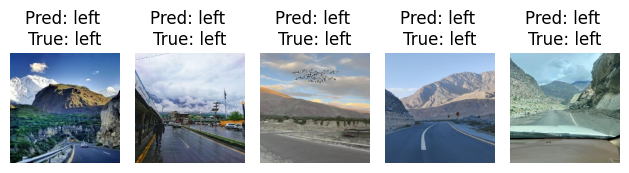

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the test generator is not being iterated multiple times
test_images, test_labels = next(iter(test_generator))

# Make predictions for this batch
predictions = model.predict(test_images)

# Define the class names (replace with your actual class names list)
class_names = ['left', 'right', 'straight', 'unexpected']

# Plot a few images with predicted and true labels
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(test_labels[i])]
    plt.title(f"Pred: {predicted_label} \nTrue: {true_label}")
    plt.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()

In [52]:
unique_true_labels = set(all_true_labels)
unique_pred_labels = set(all_pred_labels)
print("Unique classes in true labels:", unique_true_labels)
print("Unique classes in predicted labels:", unique_pred_labels)
print("Target names length:", len(class_names))


Unique classes in true labels: {0}
Unique classes in predicted labels: {0}
Target names length: 4


In [53]:
from sklearn.metrics import classification_report

# Ensure `target_names` length matches unique classes in true labels
if len(class_names) != len(unique_true_labels):
    # Adjust target names if necessary
    target_names = [class_names[i] for i in sorted(unique_true_labels)]
else:
    target_names = class_names

# Generate the classification report
report = classification_report(all_true_labels, all_pred_labels, target_names=target_names)
print(report)


              precision    recall  f1-score   support

        left       1.00      1.00      1.00        33

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [54]:
class_indices = train_generator.class_indices


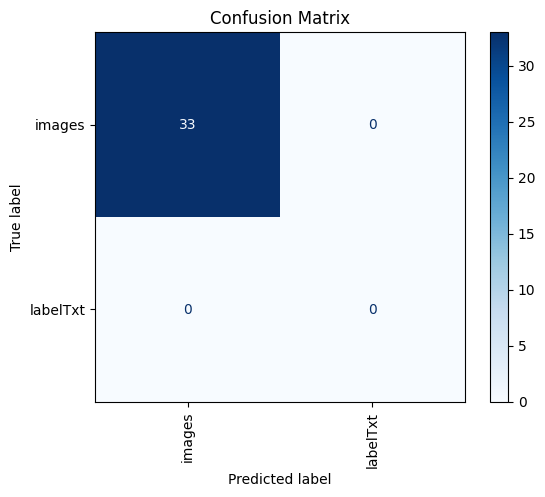

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(all_true_labels, all_pred_labels, labels=list(class_indices.values()))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_indices.keys())
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
